In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [14]:
input_data = pd.read_csv("D:/ClassNotes_BA/Data_mining/Dimensionality_Reduction/Dimensionality_Reduction_Data.csv")

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (41,175,176,177,178,183,184,185,186,189,190,197,198,201,202,203,208,210,212,219,220,221,222,223,224,227,228,229,230,231,235,237,238) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
input_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,36,2010010901,CIN,NYJ,CIN,home,NYJ,NYJ,30.0,09-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,61,2010010901,CIN,NYJ,CIN,home,NYJ,NYJ,36.0,09-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,82,2010010901,CIN,NYJ,CIN,home,NYJ,NYJ,30.0,09-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,104,2010010901,CIN,NYJ,CIN,home,NYJ,NYJ,30.0,09-01-10,...,NaN,NaN,NaN,1,upheld,NaN,0.0,0.0,0.0,0.0
4,166,2010010901,CIN,NYJ,NYJ,away,CIN,NYJ,74.0,09-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [16]:
data = input_data

np.random.seed(0)

In [17]:
data.shape

(2102, 256)

In [18]:
data.sample(10)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
1135,2058,2010011700,MIN,DAL,MIN,home,DAL,MIN,80.0,17-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1285,1578,2010011701,SD,NYJ,NYJ,away,SD,NYJ,64.0,17-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1317,2298,2010011701,SD,NYJ,NYJ,away,SD,SD,37.0,17-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1171,2924,2010011700,MIN,DAL,NaN,NaN,NaN,DAL,NaN,17-01-10,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1629,1329,2010012401,NO,MIN,NO,home,MIN,NO,70.0,24-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1675,2417,2010012401,NO,MIN,MIN,away,NO,MIN,67.0,24-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
820,2754,2010011601,NO,ARI,ARI,away,NO,ARI,80.0,16-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
906,739,2010011600,IND,BAL,IND,home,BAL,IND,67.0,16-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1571,3892,2010012400,IND,NYJ,NYJ,away,IND,NYJ,69.0,24-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1847,1817,2010013100,AFC,NFC,NFC,away,AFC,NFC,54.0,31-01-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [34]:
missing_Val=data.isnull().sum()

In [35]:
np.product(data.shape)

538112

In [36]:
data.isnull().sum().sum()

206852

In [37]:
data.isnull().sum().sum()/np.product(data.shape)

0.38440324690770694

In [38]:
missing_Val_Prcnt = data.isnull().sum()/len(data)*100

In [39]:
mis_val_table = pd.concat([missing_Val,missing_Val_Prcnt],axis=1)
mis_val_table

,0,1
play_id,0,0.000000
game_id,0,0.000000
home_team,0,0.000000
away_team,0,0.000000
posteam,70,3.330162
...,...,...
penalty_type,1972,93.815414
defensive_two_point_attempt,70,3.330162
defensive_two_point_conv,70,3.330162
defensive_extra_point_attempt,70,3.330162


In [49]:
mis_val_table.rename(columns = {0: 'Count', 1:'Prcnt'}, inplace = True)
mis_val_table

,Count,Prcnt
play_id,0,0.000000
game_id,0,0.000000
home_team,0,0.000000
away_team,0,0.000000
posteam,70,3.330162
...,...,...
penalty_type,1972,93.815414
defensive_two_point_attempt,70,3.330162
defensive_two_point_conv,70,3.330162
defensive_extra_point_attempt,70,3.330162


In [50]:
 mis_val_table.groupby('Count').count().sort_values(by='Count',ascending=False)

,Prcnt
Count,
2102,24
2101,8
2100,5
2099,2
2087,1
2080,2
2079,3
2074,3
2063,4


In [51]:
mis_val_table.groupby('Prcnt').count().sort_values(by = 'Prcnt', ascending = False).cumsum()

,Count
Prcnt,
100.000000,24
99.952426,32
99.904853,37
99.857279,39
99.286394,40
98.953378,42
98.905804,45
98.667935,48
98.144624,52


In [52]:
temp = data.dropna(how = 'all', axis=1, inplace= False)
temp.shape

(2102, 232)

In [53]:
temp = data.dropna(thresh = len(data)*.5, axis =1, inplace = False)
temp.shape

(2102, 151)

In [55]:
temp.isnull().sum().sum()/np.product(temp.shape)

0.01974782767594407

# Variance approach

In [54]:
data.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,fumble_recovery_2_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,2102.000000,2.102000e+03,2033.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,...,0.0,0.0,0.0,2102.000000,139.000000,2102.000000,2032.0,2032.0,2032.0,2032.0
mean,2108.258801,2.010012e+09,47.667978,416.871075,820.629401,1718.060419,0.019029,12.618459,0.082778,2.563749,...,NaN,NaN,NaN,1.411989,8.244604,0.007136,0.0,0.0,0.0,0.0
std,1213.061517,2.479322e+03,25.401238,278.233448,552.716130,1044.435762,0.136661,7.165481,0.275612,1.132565,...,NaN,NaN,NaN,6.313604,5.076005,0.084193,0.0,0.0,0.0,0.0
min,35.000000,2.010011e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,-6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1064.000000,2.010011e+09,30.000000,153.000000,298.000000,815.000000,0.000000,7.000000,0.000000,2.000000,...,NaN,NaN,NaN,0.000000,5.000000,0.000000,0.0,0.0,0.0,0.0
50%,2095.000000,2.010012e+09,50.000000,397.500000,814.000000,1800.000000,0.000000,12.500000,0.000000,3.000000,...,NaN,NaN,NaN,0.000000,5.000000,0.000000,0.0,0.0,0.0,0.0
75%,3136.750000,2.010012e+09,69.000000,659.000000,1296.000000,2609.000000,0.000000,19.000000,0.000000,4.000000,...,NaN,NaN,NaN,0.000000,10.000000,0.000000,0.0,0.0,0.0,0.0
max,4702.000000,2.010021e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,27.000000,1.000000,5.000000,...,NaN,NaN,NaN,83.000000,40.000000,1.000000,0.0,0.0,0.0,0.0


In [3]:
data =pd.read_csv("D:/ClassNotes_BA/Data_mining/Data.csv")

In [5]:
data.isnull().sum()

Customer_ID    0
Gender         0
Age            0
Income         0
Spends         0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
data.corr()

,Age,Income,Spends
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Spends,-0.327227,0.009903,1.000000


In [8]:
data.var()

Age       1.951332e+02
Income    6.898356e+10
Spends    6.668543e+10
dtype: float64

In [9]:
data.nunique()

Customer_ID    200
Gender           2
Age             51
Income          64
Spends          84
dtype: int64

In [10]:
data.set_index(["Customer_ID"],inplace=True)

In [11]:
data.head()

,Gender,Age,Income,Spends
Customer_ID,,,,
2020_001,Male,19,150000,390000
2020_002,Male,21,150000,810000
2020_003,Female,20,160000,60000
2020_004,Female,23,160000,770000
2020_005,Female,31,170000,400000


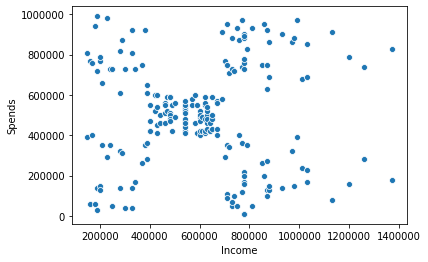

In [13]:
sns.scatterplot(data["Income"],data["Spends"])

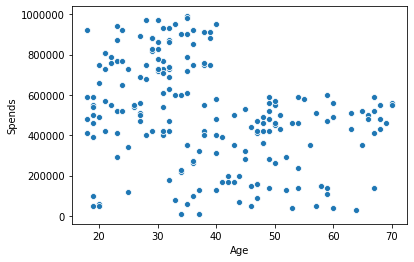

In [14]:
sns.scatterplot(data["Age"],data["Spends"])

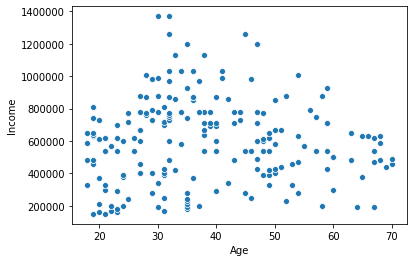

In [15]:
sns.scatterplot(data["Age"],data["Income"])

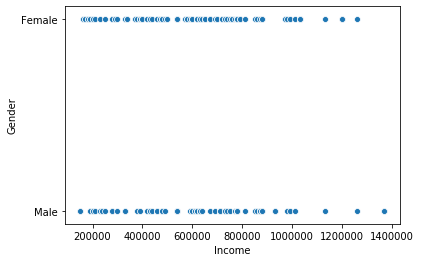

In [16]:
sns.scatterplot(data["Income"],data["Gender"])

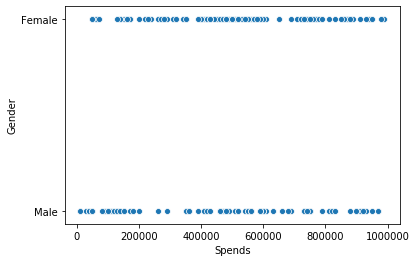

In [17]:
sns.scatterplot(data["Spends"],data["Gender"])

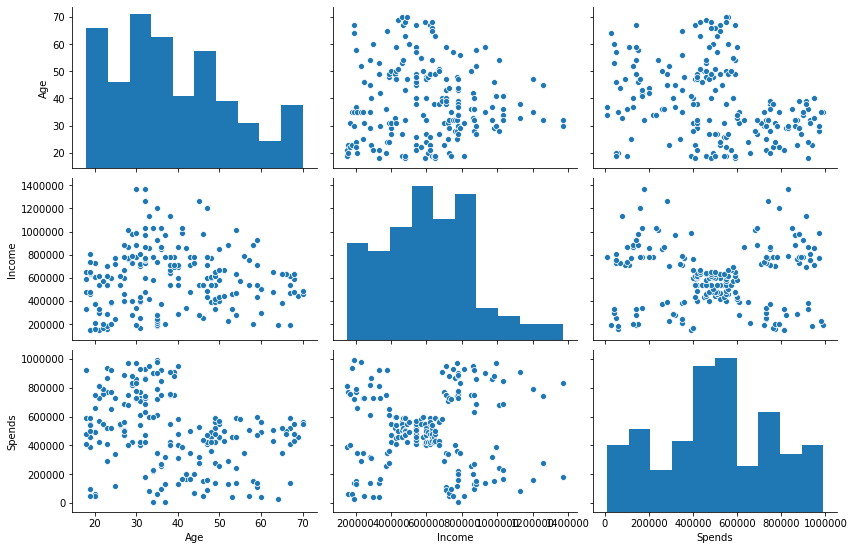

In [19]:
data1= data.drop(columns="Gender",axis=1)
data1.head()

,Age,Income,Spends
Customer_ID,,,
2020_001,19,150000,390000
2020_002,21,150000,810000
2020_003,20,160000,60000
2020_004,23,160000,770000
2020_005,31,170000,400000


In [20]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters=3)
km.fit(data1)
km.labels_
data1["km_labels"]=km.labels_
data1

,Age,Income,Spends,km_labels
Customer_ID,,,,
2020_001,19,150000,390000,2
2020_002,21,150000,810000,2
2020_003,20,160000,60000,2
2020_004,23,160000,770000,2
2020_005,31,170000,400000,2
...,...,...,...,...
2020_196,35,1200000,790000,0
2020_197,45,1260000,280000,1
2020_198,32,1260000,740000,0


In [30]:
fig = plt.figsize=(20,6)
ax2=plt.axes()

sns.scatterplot(data["Income"],data["Spends"],hue=data1["km_labels"],palette=sns_palette("hls",6)
                

SyntaxError: unexpected EOF while parsing (<ipython-input-30-946cd201242e>, line 5)